In [2]:
BASE_FOLDER = '../../'
import scipy.signal as sig
import numpy as np
import librosa
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import os
cmap_b = cm.get_cmap(name='Blues', lut=None)
cmap_r = cm.get_cmap(name='Reds', lut=None)

In [39]:
def makePSD(file_path,ab='blue'):
    audio_ch  = librosa.load(file_path, sr=None, mono=False)
    f, Pxx = sig.welch(audio_ch[0][1],audio_ch[1],window='hamming',nperseg=128, noverlap=False, nfft=512,scaling='spectrum')
    plt.plot(f, Pxx, color=ab)
    ax = plt.gca()
    ax.set_xscale('log')
    ax.set_yscale('log')

def plot_and_save_it(m,i='02'):
    p = os.path.abspath(BASE_FOLDER+r'\dataset\6dB'+ '\\'+m+'\\id_' + i) 
    plt.figure(figsize=(16,9)) 
    makePSD(p + r'\normal\00000001.wav', ab=cmap_b(0.1))
    makePSD(p + r'\normal\00000006.wav', ab=cmap_b(0.2))
    makePSD(p + r'\normal\00000100.wav', ab=cmap_b(0.4))
    makePSD(p + r'\normal\00000355.wav', ab=cmap_b(0.5))
    makePSD(p + r'\abnormal\00000033.wav', ab=cmap_r(0.1))
    makePSD(p + r'\abnormal\00000017.wav', ab=cmap_r(0.2))
    makePSD(p + r'\abnormal\00000002.wav', ab=cmap_r(0.3))
    plt.axis('off')
    plt.gca().set_axis_off()
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
            hspace = 0, wspace = 0)
    plt.margins(0,0)
    #plt.gca().xaxis.set_major_locator(plt.NullLocator())
    #plt.gca().yaxis.set_major_locator(plt.NullLocator())
    #plt.grid()
    plt.savefig(m+i+'.png', transparent=True, dpi=300,
    pad_inches = 0)
    

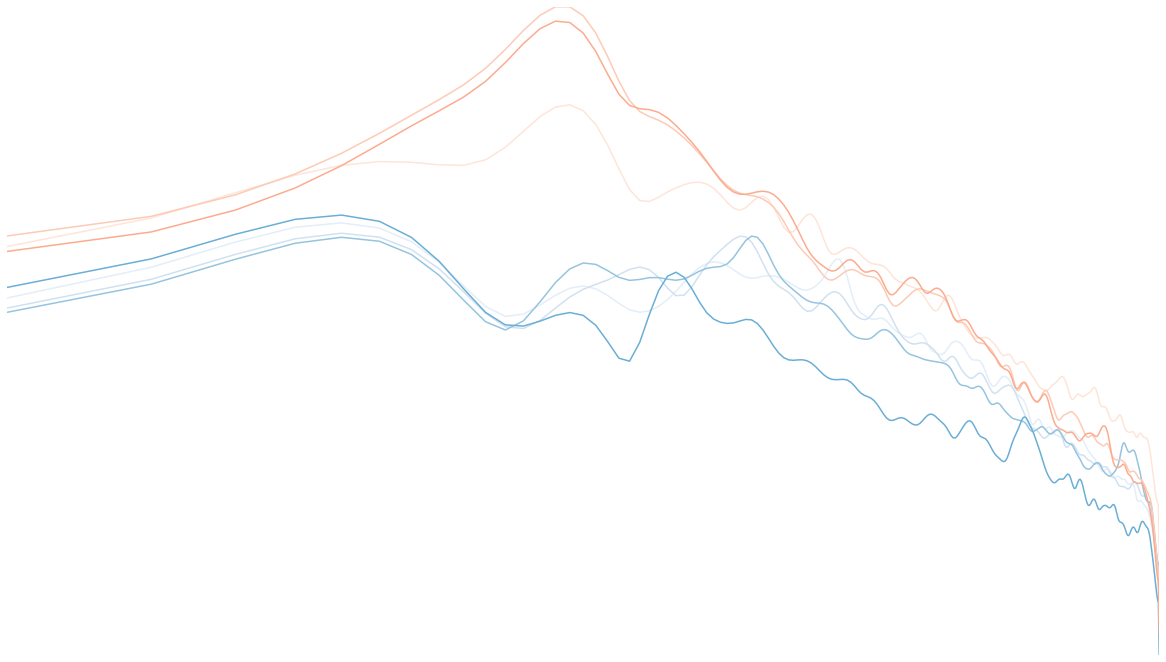

In [40]:
plot_and_save_it(m='pump',i='00')

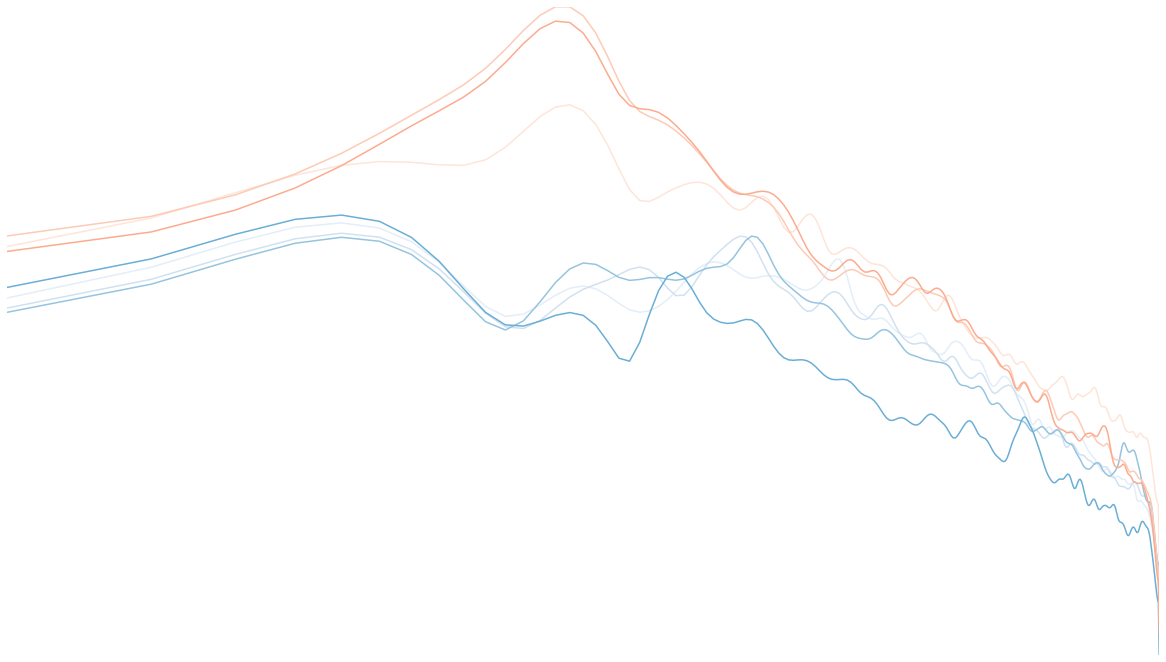

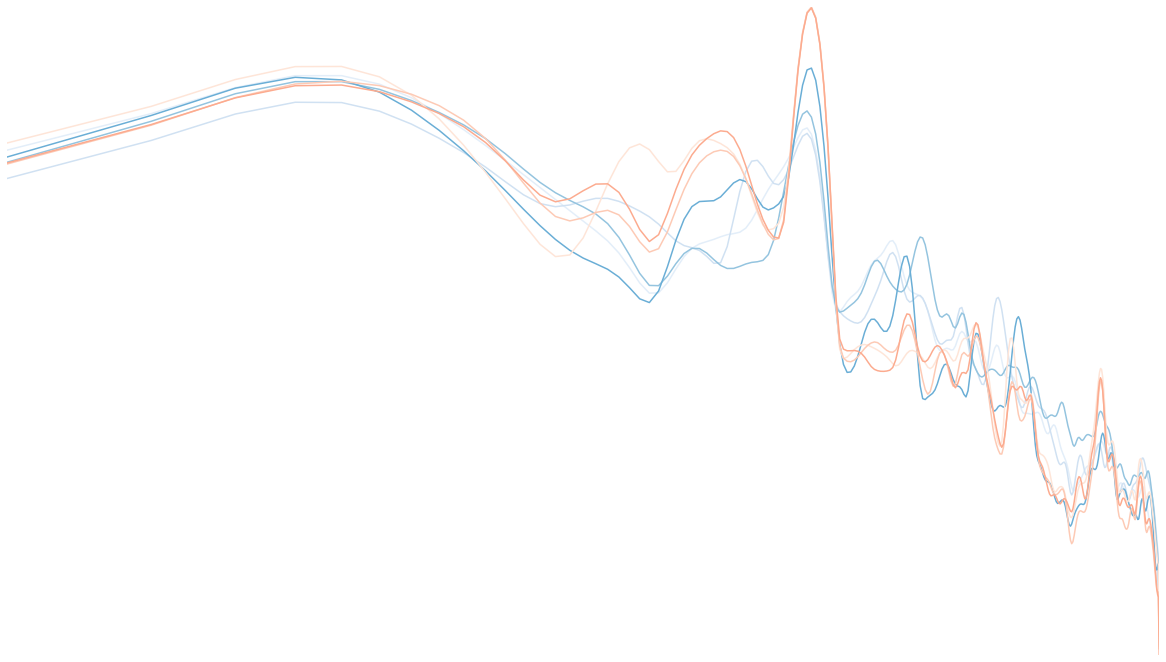

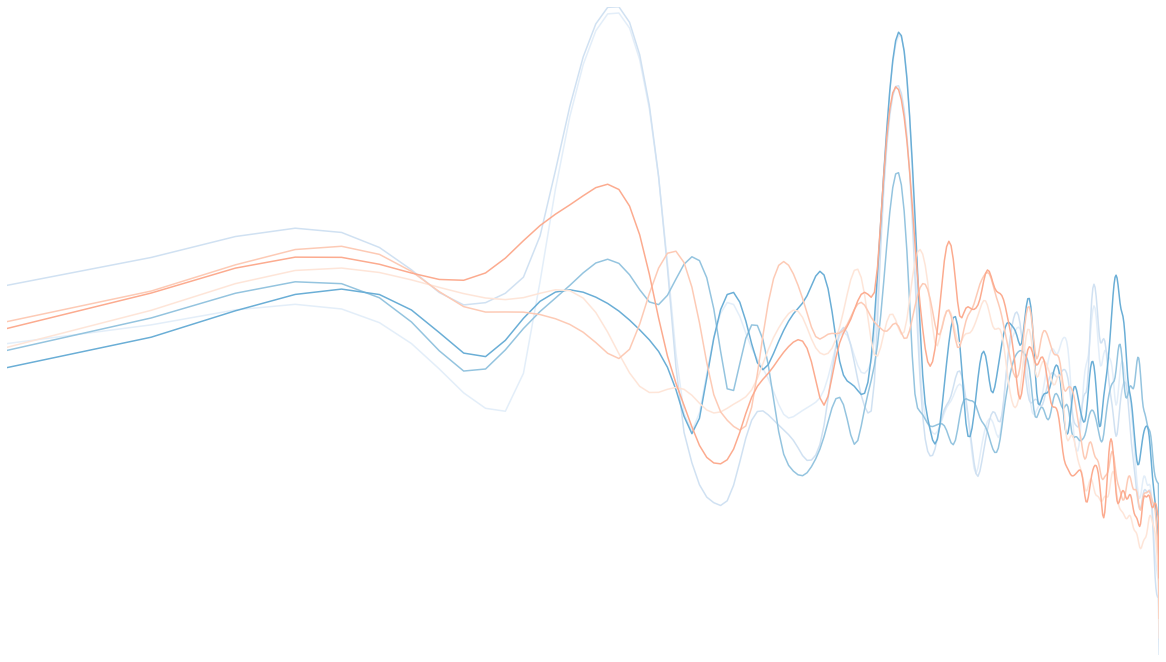

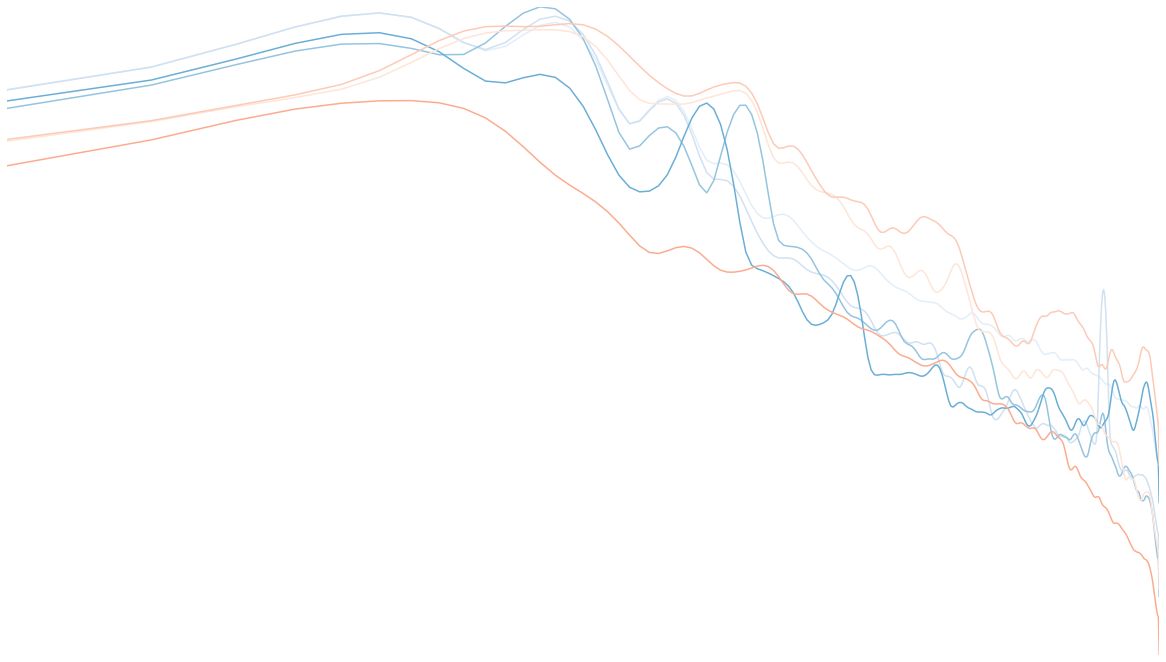

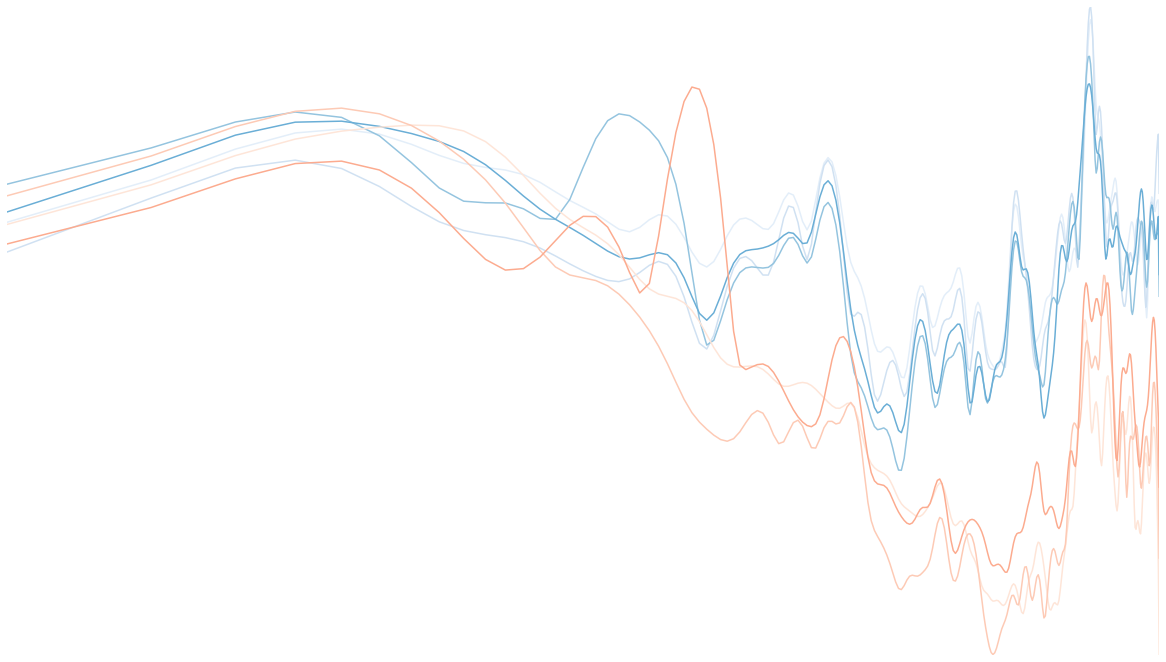

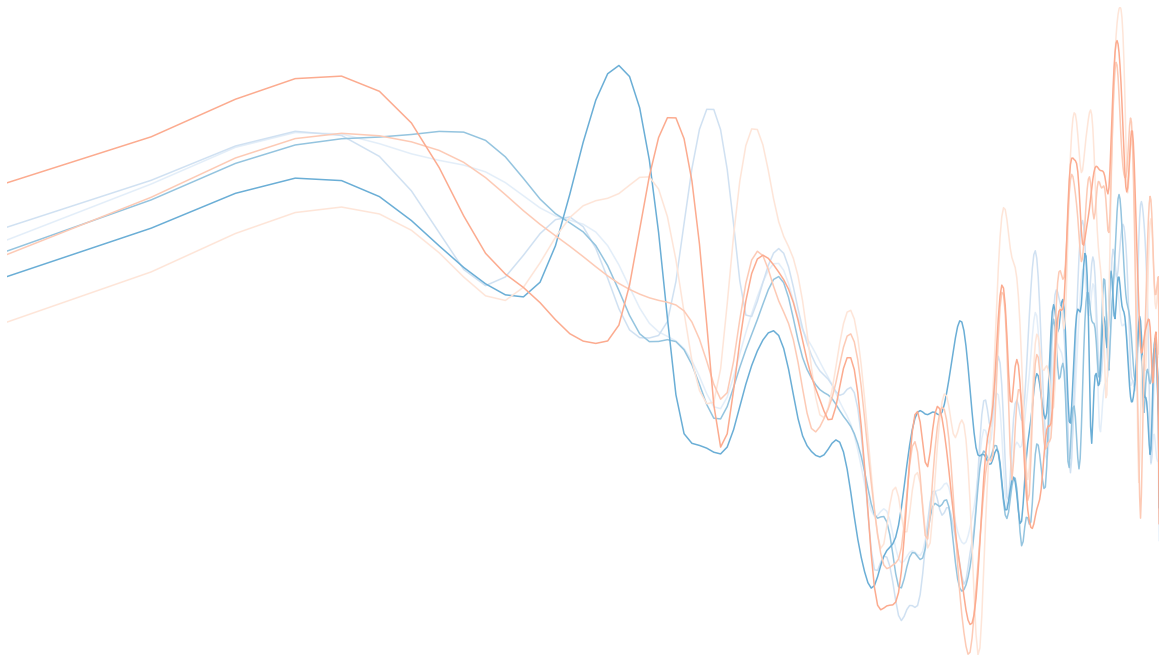

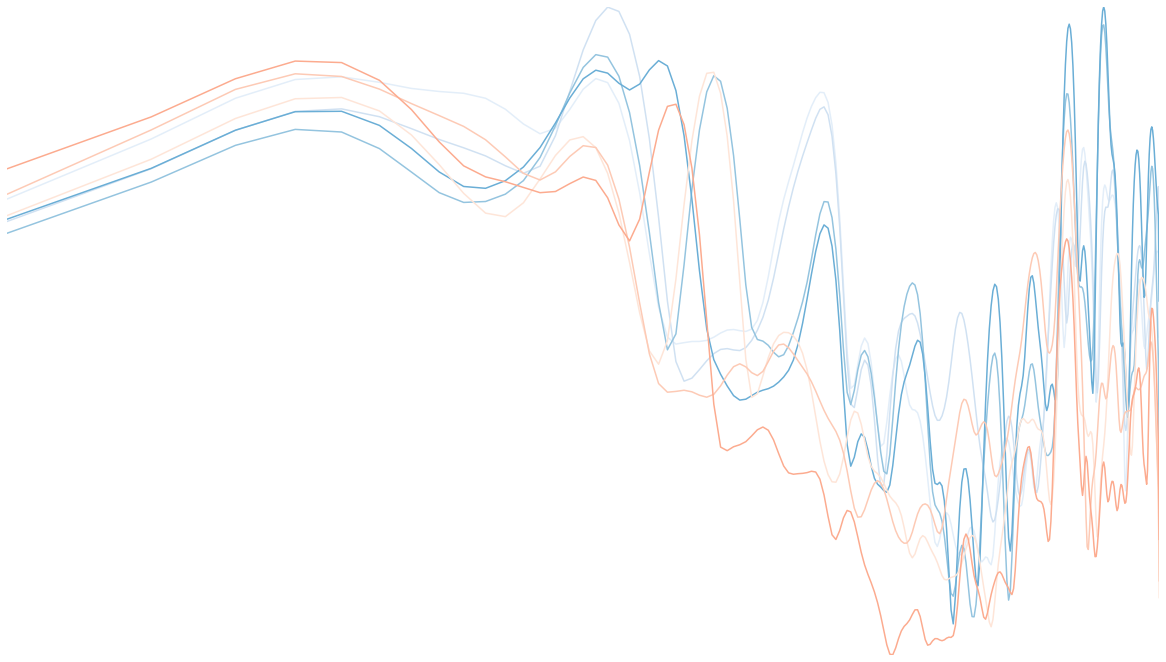

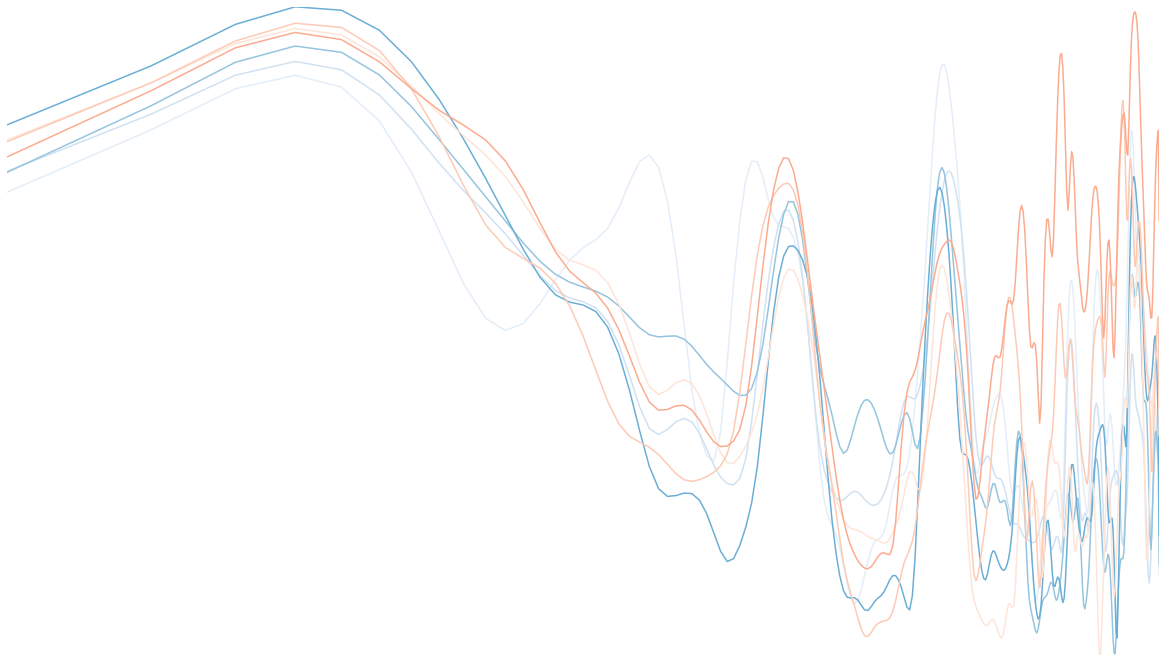

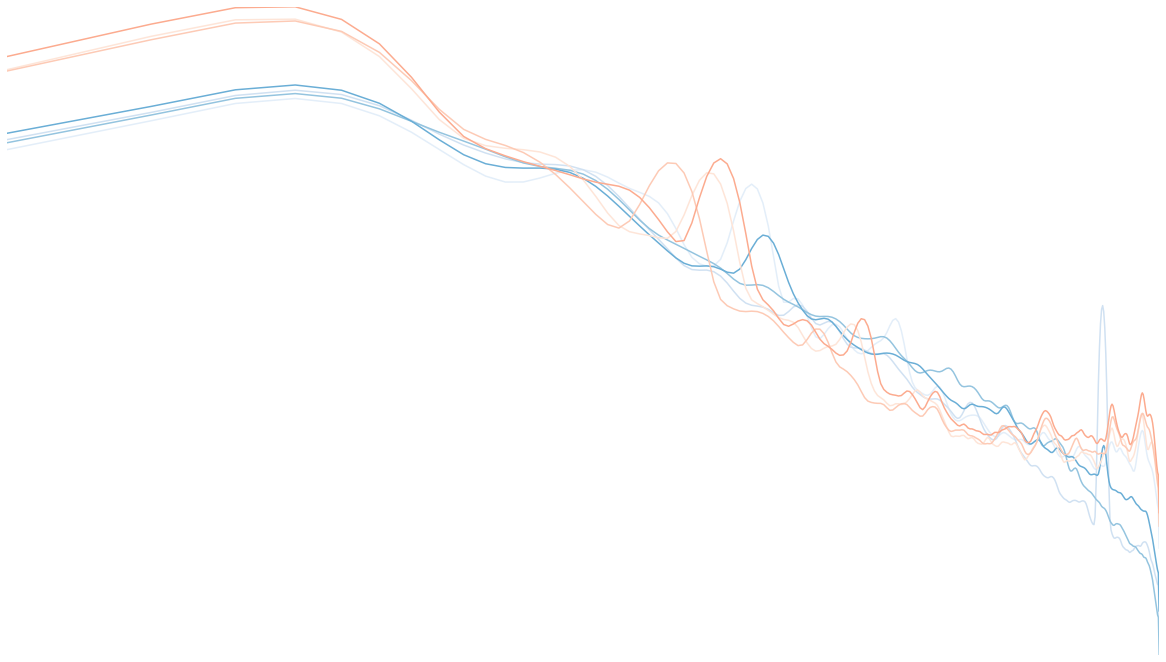

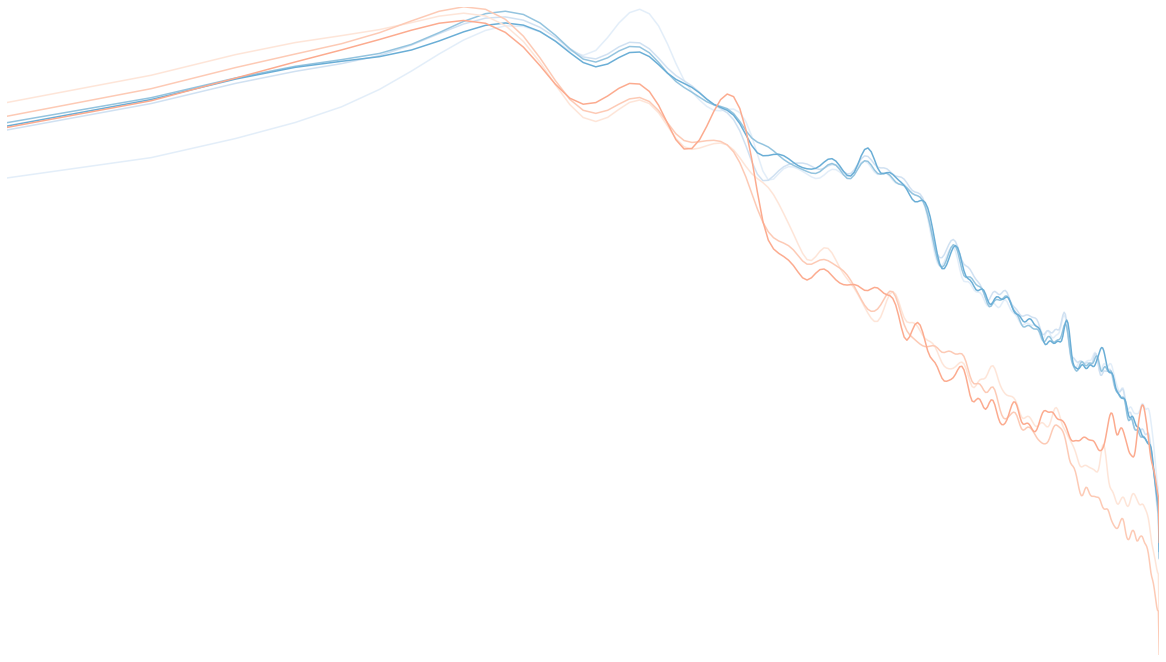

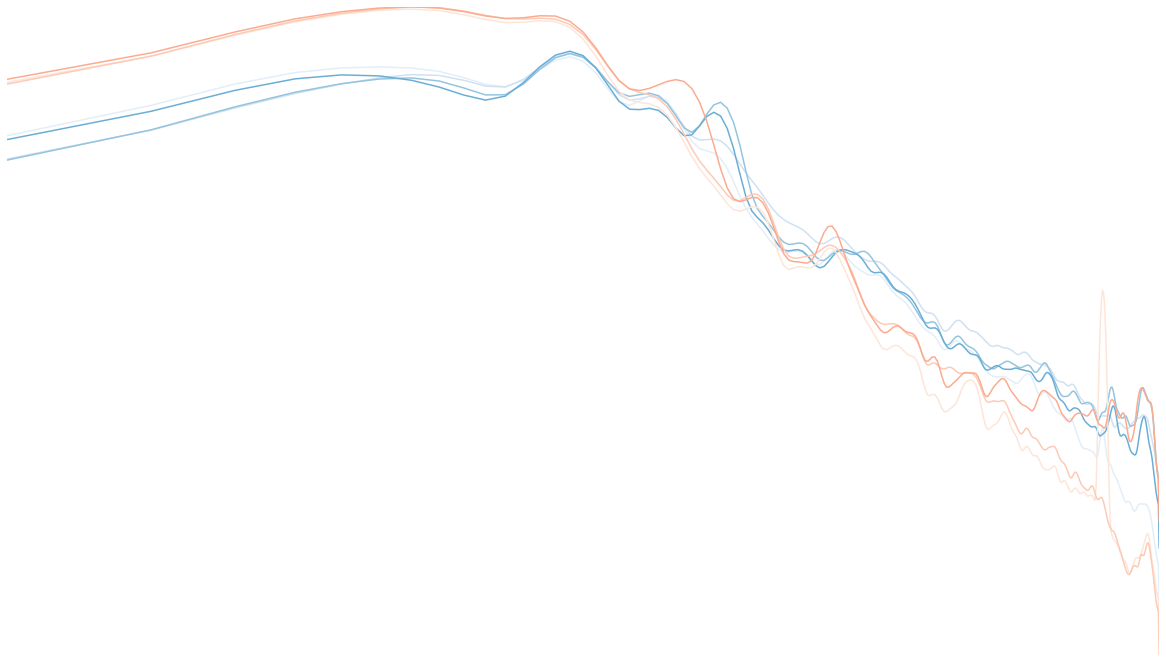

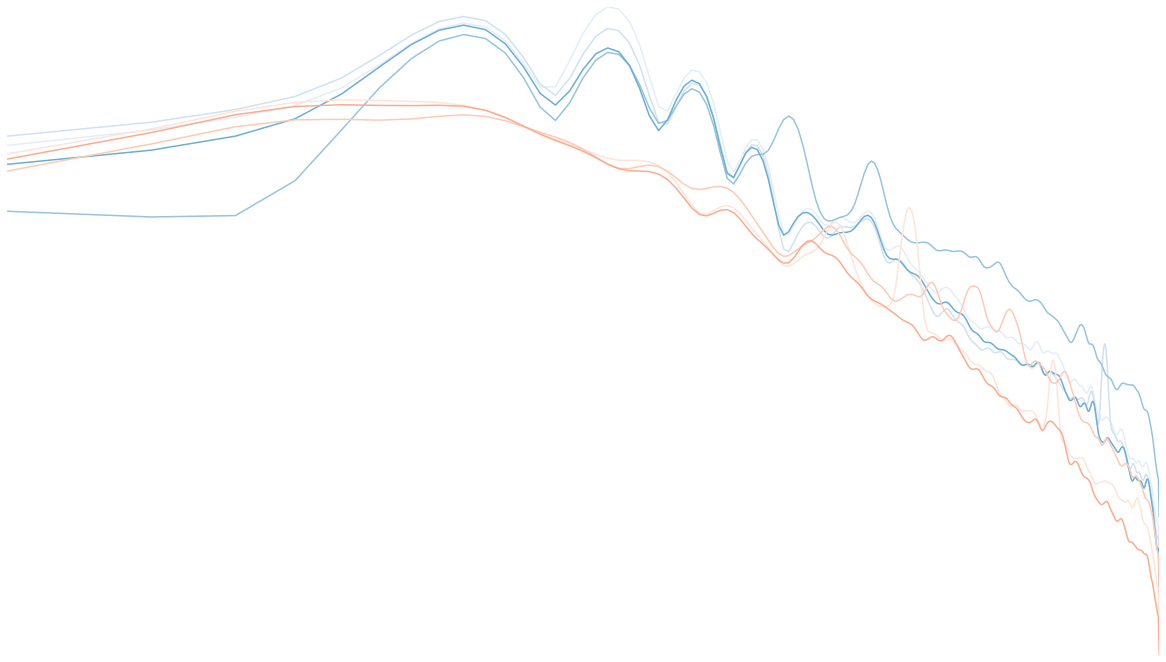

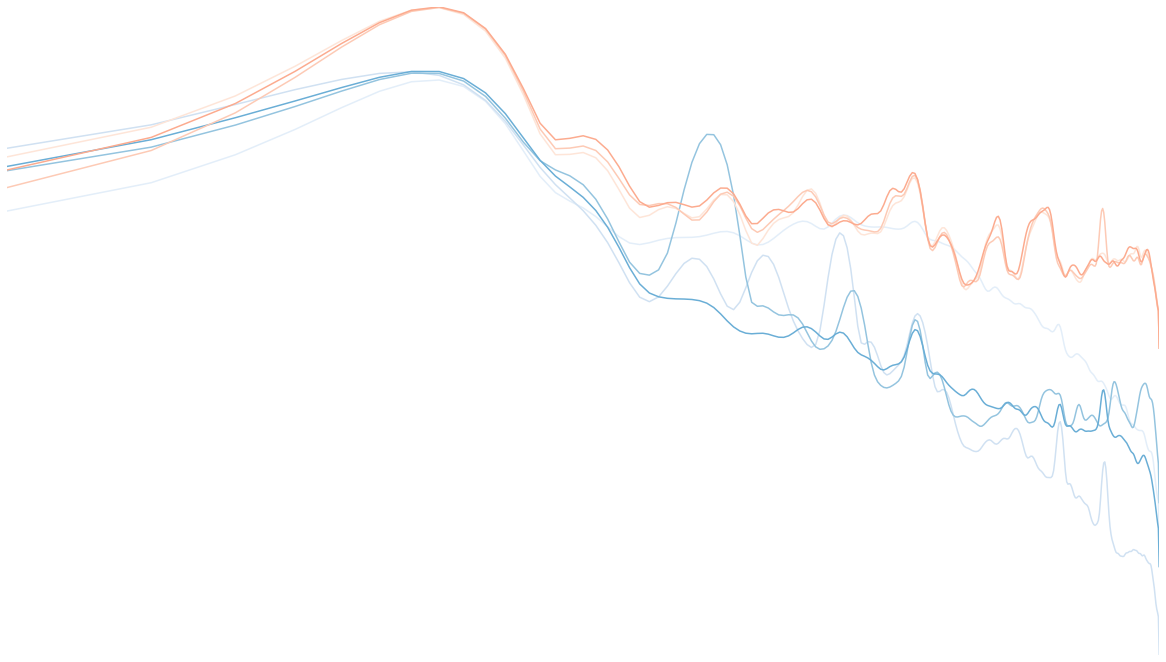

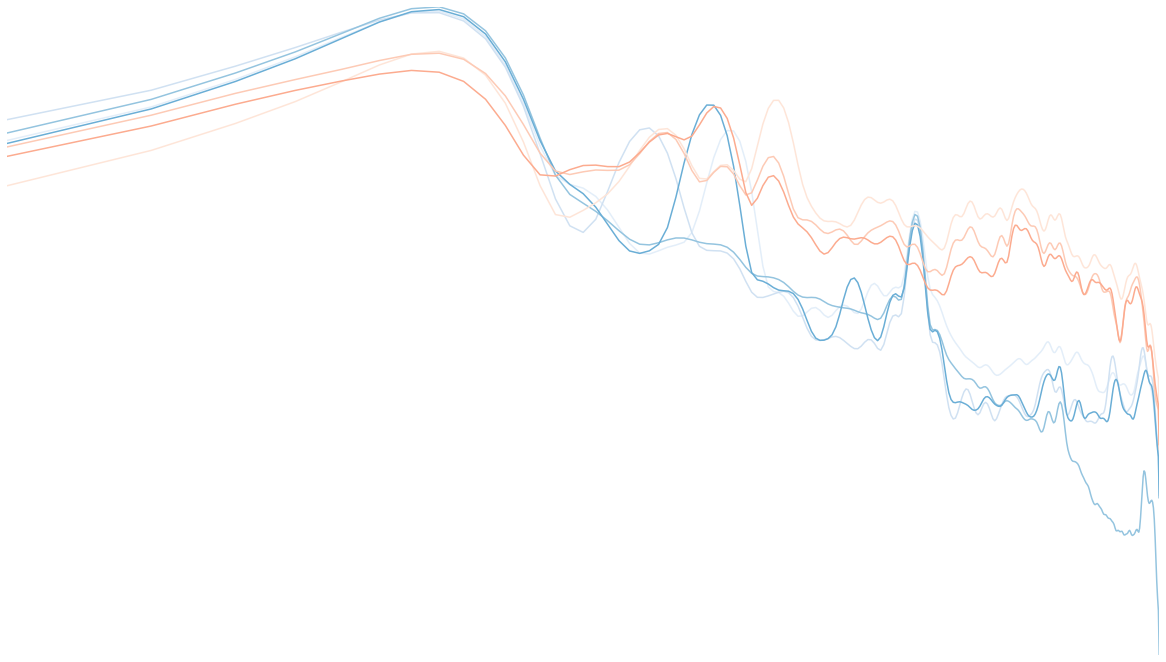

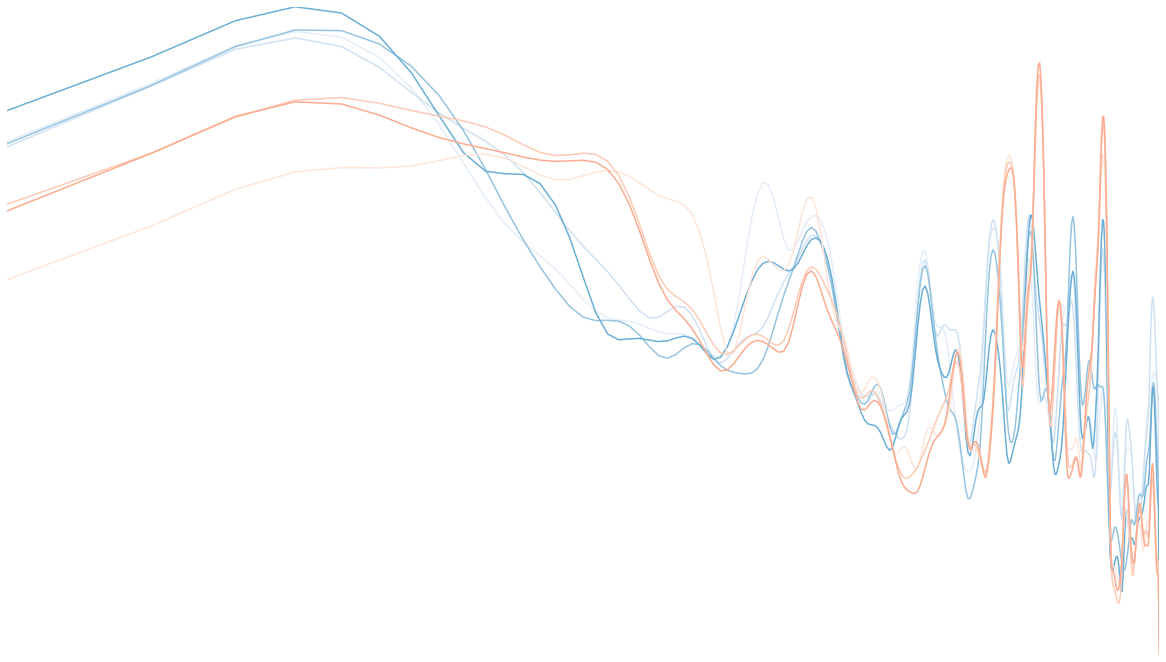

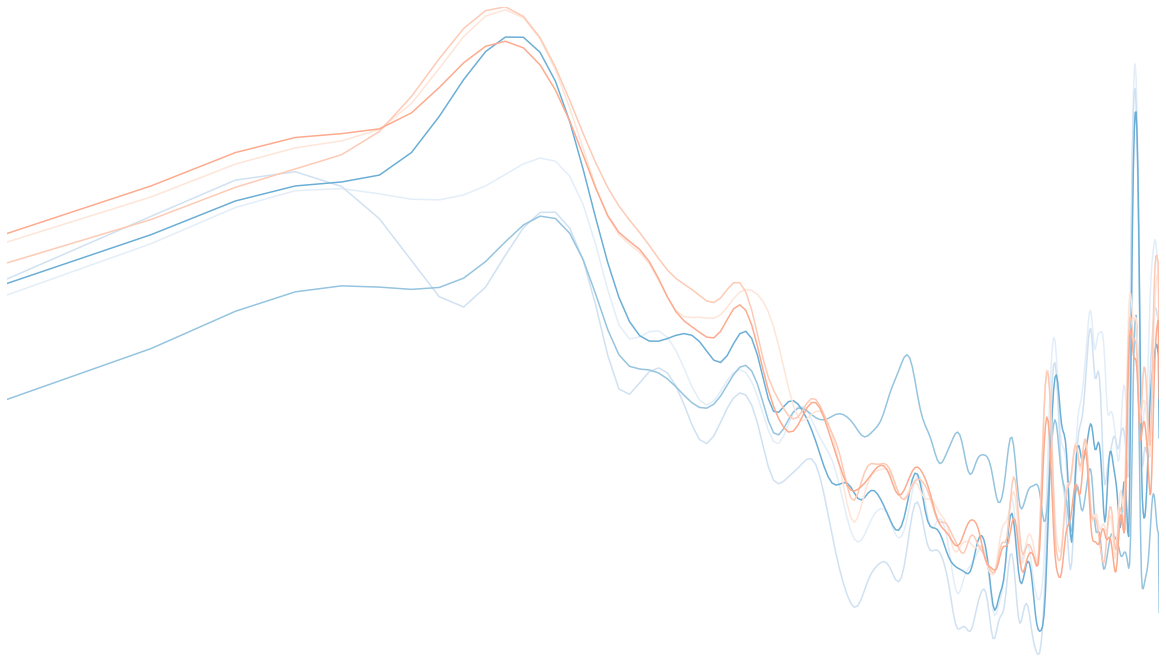

In [37]:
for i in ['pump','valve','fan','slider']:
    for j in ['00','02','04','06']:
        plot_and_save_it(m=i,i=j)
